In [ ]:

# Data handling libraries
import pandas as pd
import numpy as np



In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score,
    confusion_matrix,
    classification_report
)

# To ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load dataset
df = pd.read_excel("../Data/Fraud_Analysis_Dataset.xlsx")

# Display first 5 rows
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [6]:
# Shape of dataset
df.shape


(11142, 10)

In [7]:
# Column names
df.columns


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [8]:
# Data types & missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


In [9]:
df.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,11142.000000,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,11142.000000
mean,8.717645,2.131915e+05,9.241173e+05,8.249576e+05,8.883541e+05,1.103211e+06,0.102495
std,16.067479,7.600650e+05,2.143004e+06,2.089894e+06,2.601376e+06,2.982447e+06,0.303312
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.946618e+03,4.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.676126e+04,2.816950e+04,4.420605e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.543366e+05,3.040855e+05,1.114126e+05,2.711555e+05,3.186374e+05,0.000000
max,95.000000,1.000000e+07,1.990000e+07,1.300000e+07,3.300000e+07,3.460000e+07,1.000000


In [10]:
# Count of fraud vs non-fraud
df['isFraud'].value_counts()



isFraud
0    10000
1     1142
Name: count, dtype: int64

In [11]:
# Percentage distribution
df['isFraud'].value_counts(normalize=True) * 100


isFraud
0    89.750494
1    10.249506
Name: proportion, dtype: float64

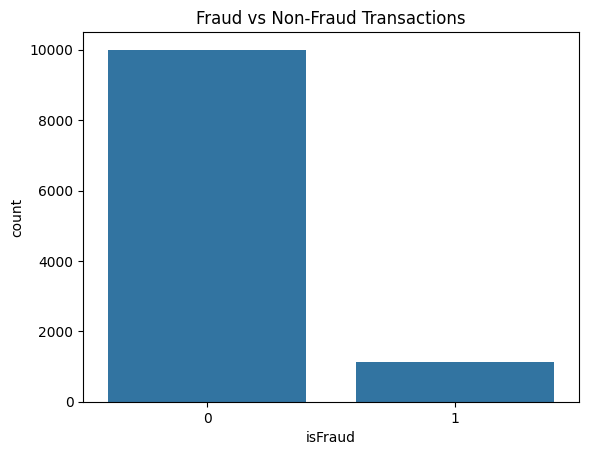

In [12]:
sns.countplot(x='isFraud', data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()


In [13]:
# Transaction type counts
df['type'].value_counts()


type
PAYMENT     5510
CASH_IN     1951
CASH_OUT    1871
TRANSFER    1464
DEBIT        346
Name: count, dtype: int64

In [14]:
# Fraud by transaction type
pd.crosstab(df['type'], df['isFraud'])


isFraud,0,1
type,,
CASH_IN,1951,0
CASH_OUT,1293,578
DEBIT,346,0
PAYMENT,5510,0
TRANSFER,900,564


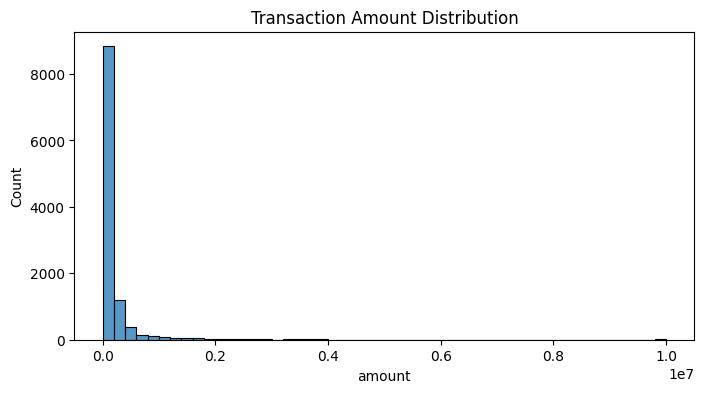

In [15]:
# Distribution of transaction amounts
plt.figure(figsize=(8,4))
sns.histplot(df['amount'], bins=50)
plt.title("Transaction Amount Distribution")
plt.show()


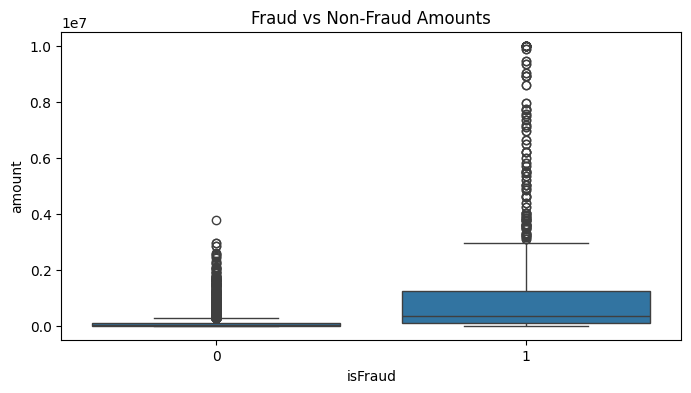

In [16]:
# Fraud vs Non-fraud amount comparison
plt.figure(figsize=(8,4))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title("Fraud vs Non-Fraud Amounts")
plt.show()


In [17]:
# Difference between balances
df['balance_diff'] = df['oldbalanceOrg'] - df['newbalanceOrig']

df[['oldbalanceOrg', 'newbalanceOrig', 'balance_diff']].head()


,oldbalanceOrg,newbalanceOrig,balance_diff
0,181.0,0.0,181.0
1,181.0,0.0,181.0
2,2806.0,0.0,2806.0
3,2806.0,0.0,2806.0
4,20128.0,0.0,20128.0


In [18]:
df.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
balance_diff      0
dtype: int64

In [19]:
# Encode transaction type
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])

df[['type', 'type_encoded']].head()


,type,type_encoded
0,TRANSFER,4
1,CASH_OUT,1
2,TRANSFER,4
3,CASH_OUT,1
4,TRANSFER,4


In [20]:
# Drop ID-like columns
df_model = df.drop(['nameOrig', 'nameDest', 'type'], axis=1)


In [21]:
X = df_model.drop('isFraud', axis=1)
y = df_model['isFraud']


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [23]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [25]:
y_pred_lr = lr.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_pred_lr))


Accuracy: 0.9887842081650965
Precision: 0.9903381642512077
Recall: 0.8991228070175439
F1 Score: 0.9425287356321839
ROC AUC: 0.9490616533838344


In [27]:
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.99      0.90      0.94       228

    accuracy                           0.99      2229
   macro avg       0.99      0.95      0.97      2229
weighted avg       0.99      0.99      0.99      2229



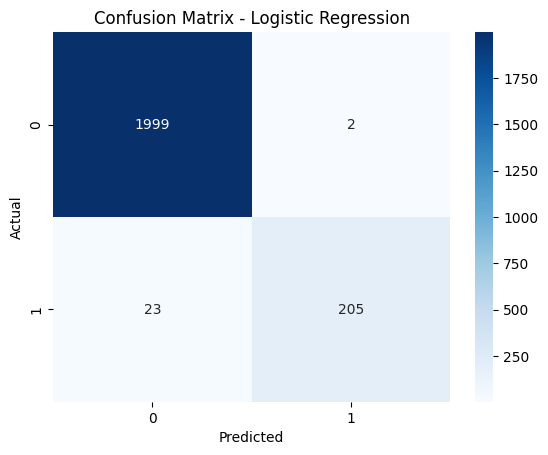

In [28]:
cm = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [30]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)


In [31]:
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_pred_rf))


Accuracy: 0.9964109466128309
Precision: 1.0
Recall: 0.9649122807017544
F1 Score: 0.9821428571428571
ROC AUC: 0.9824561403508771


In [33]:
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2001
           1       1.00      0.96      0.98       228

    accuracy                           1.00      2229
   macro avg       1.00      0.98      0.99      2229
weighted avg       1.00      1.00      1.00      2229



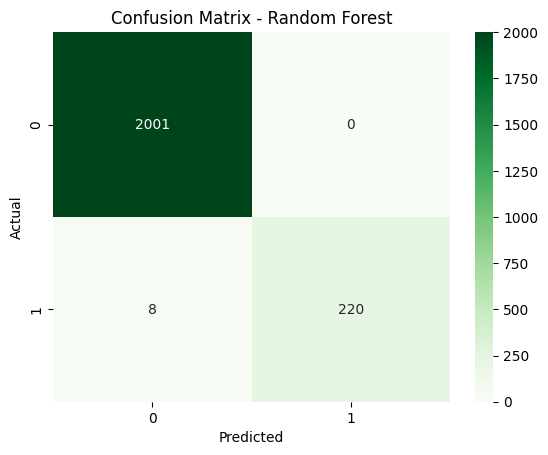

In [34]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [35]:
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf)
    ],
    'ROC AUC': [
        roc_auc_score(y_test, y_pred_lr),
        roc_auc_score(y_test, y_pred_rf)
    ]
})

model_comparison


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.988784,0.990338,0.899123,0.942529,0.949062
1,Random Forest,0.996411,1.000000,0.964912,0.982143,0.982456


In [36]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance


,Feature,Importance
0,step,0.400980
6,balance_diff,0.202387
3,newbalanceOrig,0.127565
1,amount,0.092185
2,oldbalanceOrg,0.070245
7,type_encoded,0.054192
5,newbalanceDest,0.028285
4,oldbalanceDest,0.024161


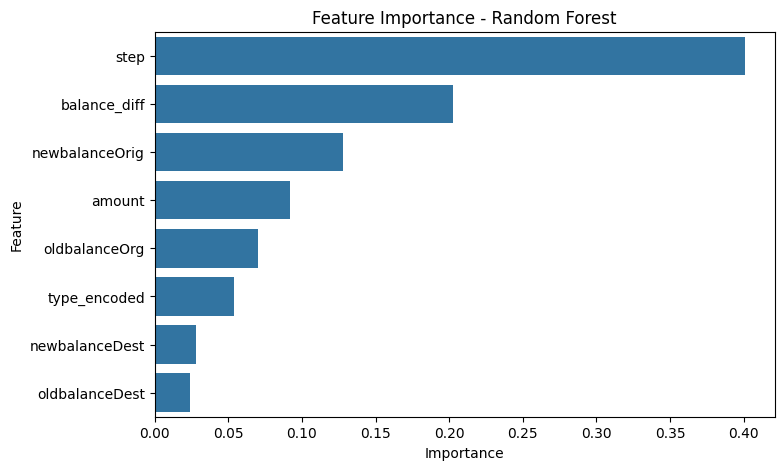

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance
)
plt.title("Feature Importance - Random Forest")
plt.show()


In [38]:
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)

print("Train Accuracy:", train_score)
print("Test Accuracy:", test_score)


Train Accuracy: 1.0
Test Accuracy: 0.9964109466128309


In [39]:
from imblearn.over_sampling import SMOTE


In [40]:
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [41]:
# Check new class distribution
pd.Series(y_train_smote).value_counts()


isFraud
0    7999
1    7999
Name: count, dtype: int64

In [42]:
rf_smote = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_smote.fit(X_train_smote, y_train_smote)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [43]:
y_pred_rf_smote = rf_smote.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf_smote))
print("Precision:", precision_score(y_test, y_pred_rf_smote))
print("Recall:", recall_score(y_test, y_pred_rf_smote))
print("F1 Score:", f1_score(y_test, y_pred_rf_smote))
print("ROC AUC:", roc_auc_score(y_test, y_pred_rf_smote))


Accuracy: 0.9977568416330193
Precision: 0.9955555555555555
Recall: 0.9824561403508771
F1 Score: 0.9889624724061811
ROC AUC: 0.9909781951129698


In [44]:
print(classification_report(y_test, y_pred_rf_smote))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2001
           1       1.00      0.98      0.99       228

    accuracy                           1.00      2229
   macro avg       1.00      0.99      0.99      2229
weighted avg       1.00      1.00      1.00      2229



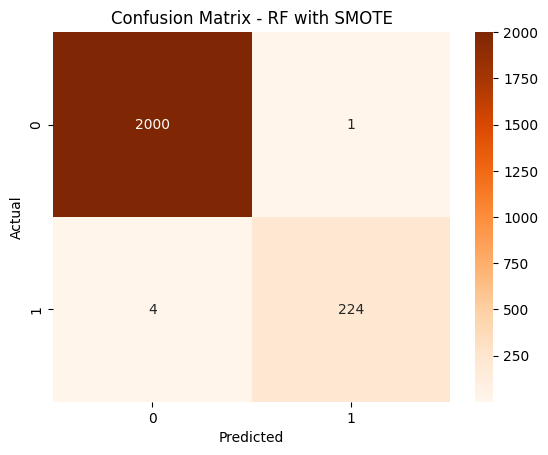

In [45]:
cm_smote = confusion_matrix(y_test, y_pred_rf_smote)

sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - RF with SMOTE")
plt.show()


In [46]:
comparison_final = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Random Forest',
        'Random Forest + SMOTE'
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_rf_smote)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_rf_smote)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_rf_smote)
    ],
    'ROC AUC': [
        roc_auc_score(y_test, y_pred_lr),
        roc_auc_score(y_test, y_pred_rf),
        roc_auc_score(y_test, y_pred_rf_smote)
    ]
})

comparison_final


,Model,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.990338,0.899123,0.942529,0.949062
1,Random Forest,1.000000,0.964912,0.982143,0.982456
2,Random Forest + SMOTE,0.995556,0.982456,0.988962,0.990978


In [47]:
y_prob = rf_smote.predict_proba(X_test)[:,1]

# Custom threshold
y_custom_pred = (y_prob > 0.3).astype(int)

print("Recall:", recall_score(y_test, y_custom_pred))
print("Precision:", precision_score(y_test, y_custom_pred))


Recall: 0.9868421052631579
Precision: 0.9782608695652174


In [48]:
import pickle

In [49]:
with open(r'C:\Users\Ajay\fraud_detection_project\Model\rf_smote_model.pkl', 'wb') as f:
    pickle.dump(rf_smote, f)

In [50]:
import joblib


In [57]:
joblib.dump(rf_smote, r"..\Model\rf_smote_model.pkl")


['..\\Model\\rf_smote_model.pkl']

In [58]:
joblib.dump(scaler, r"..\Model\scaler.pkl")


['..\\Model\\scaler.pkl']